In [120]:
import numpy as np
import time
from scipy.linalg import eig,eigh,pinv
from scipy.special import j0,j1
from scipy.integrate import quad
from matplotlib import pyplot as plt

In [101]:
def SampleFunc0(q,r1=1,r2=2,dz=1):
    """The idea is to evaluate this at a series of q-values s.t. q>k(=1)"""
    
    k=1
    kappa=np.sqrt(q**2-k**2)
    
    return j0(q*r1)*j0(q*r2)*np.exp(-kappa*dz)*q/kappa

def SampleFunc1(q,r1=1,r2=2,dz=1):
    """The idea is to evaluate this at a series of q-values s.t. q>k(=1)"""
    
    k=1
    kappa=np.sqrt(q**2-k**2)
    
    return j1(q*r1)*j1(q*r2)*np.exp(-kappa*dz)*q/kappa


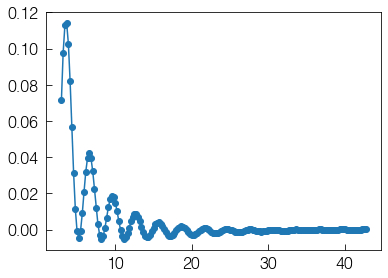

In [128]:
r1=1; r2=1.1
dz=.1

q0=3
span=4
samples_per_period=4

Dq=span/dz
dq=1/np.max((r1,r2,dz))*1/samples_per_period
N=int(Dq/dq)
L=int(N/2)

qs=q0+dq*np.arange(N)
xs=SampleFunc0(qs,r1,r2,dz)
plt.plot(qs,xs,marker='o')

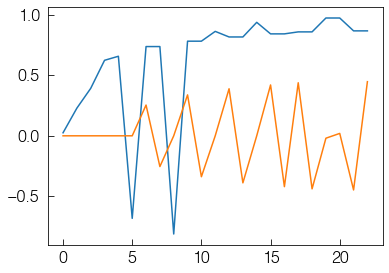

In [129]:
Y1_inds=np.arange(N-L)[:,np.newaxis]+np.arange(L)[np.newaxis,:]
Y1=xs[Y1_inds]
Y2=xs[Y1_inds+1]
zs=eig(a=Y2,b=Y1)[0]
zs=sorted(zs[np.abs(zs)<1],key=lambda z: np.abs(z))
zs=np.array(zs)
plt.plot(zs.real)
plt.plot(zs.imag)

In [130]:
Zlstsq=(zs[np.newaxis,:])**(np.arange(N)[:,np.newaxis])
Rs=pinv(Zlstsq) @ np.matrix(xs).T
Rs=np.array(Rs).squeeze()

Rsq: (6.704643660976212e-09-9.049568683018187e-21j)
Integral: (0.21554710183441364+3.6625925098777296e-08j)


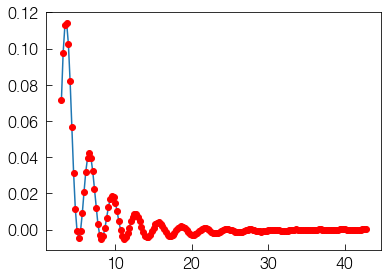

In [131]:
def Synth(zs,Rs):
    
    result=0
    for z,R in zip(zs,Rs):
        result+=R*z**np.arange(N)
        
    return result

def Integrate(zs,Rs):
    
    return dq*np.sum(Rs/-np.log(zs))

synth=Synth(zs,Rs)
plt.plot(qs,synth.real)
plt.plot(qs,xs,marker='o',ls='',color='r')

Rsq=np.sqrt(np.sum((synth-xs)**2))/N
print('Rsq:',Rsq)
print('Integral:',Integrate(zs,Rs))

In [132]:
def IntegrateGMPF(func,r1,r2,dz,q0=2,span=4,samples_per_period=4):
    
    Dq=span/dz
    dq=1/np.max((r1,r2,dz))*1/samples_per_period
    N=int(Dq/dq)
    L=int(N/2)

    qs=q0+dq*np.arange(N)
    xs=func(qs,r1,r2,dz)
    
    Y1_inds=np.arange(N-L)[:,np.newaxis]+np.arange(L)[np.newaxis,:]
    Y1=xs[Y1_inds]
    Y2=xs[Y1_inds+1]
    zs=eig(a=Y2,b=Y1)[0]
    zs=sorted(zs[np.abs(zs)<1],key=lambda z: np.abs(z))
    zs=np.array(zs)
    
    Zlstsq=(zs[np.newaxis,:])**(np.arange(N)[:,np.newaxis])
    Rs=pinv(Zlstsq) @ np.matrix(xs).T
    Rs=np.array(Rs).squeeze()
    
    result=dq*np.sum(Rs/-np.log(zs))
    
    return result

In [165]:
q0=3
r1=1
r2=2
dz=10

t0=time.time()
result=quad(SampleFunc0,q0,np.inf,args=(r1,r2,dz))
print('Time:',time.time()-t0)
print('Quad result:',result)

t0=time.time()
result=IntegrateGMPF(SampleFunc0,r1,r2,dz,q0=q0,\
                     span=2,samples_per_period=4)
print('Time:',time.time()-t0)
print('GMPF result:',result)

Time: 0.0001919269561767578
Quad result: (-2.9709499686125644e-15, 1.996964006089231e-17)
Time: 0.0009157657623291016
GMPF result: (-2.9709533393711797e-15+2.199344203756181e-28j)
